In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from statsmodels.tsa.ar_model import  AutoReg

In [2]:
df=pd.read_csv('Neonatal_Som.csv',index_col=0,parse_dates=True)

In [3]:
x=df.values

In [5]:
df.head()

,Neonatal_Som
year,
1977-01-01,92.708172
1978-01-01,92.841835
1979-01-01,92.996534
1980-01-01,93.026257
1981-01-01,92.812763


<Axes: xlabel='year'>

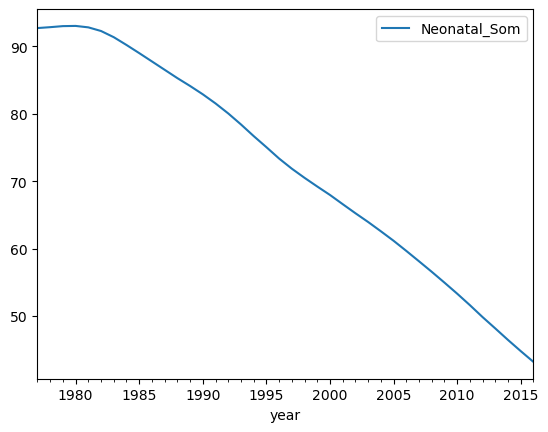

In [4]:
df.plot()

In [6]:
from statsmodels.tsa.stattools import adfuller

In [8]:
dftest=adfuller(df['Neonatal_Som'], autolag='AIC')

In [9]:
print(" 1: ADF: ", dftest[0])
print(" 2: P-value ", dftest[1])
print(" 3: number of lag: ", dftest[2])

 1: ADF:  1.5848684212289321
 2: P-value  0.9978114621598954
 3: number of lag:  3


In [12]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

/Users/kasahunabdisa/anaconda3/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


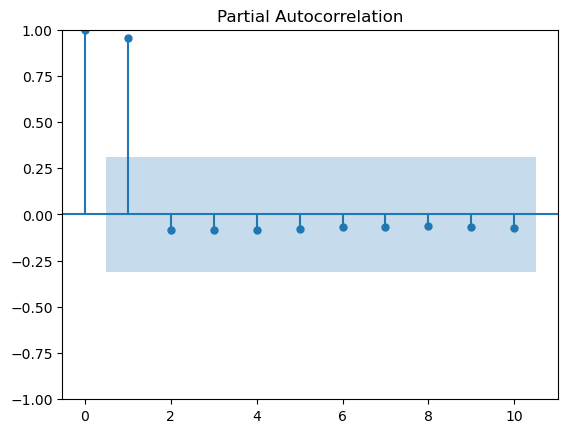

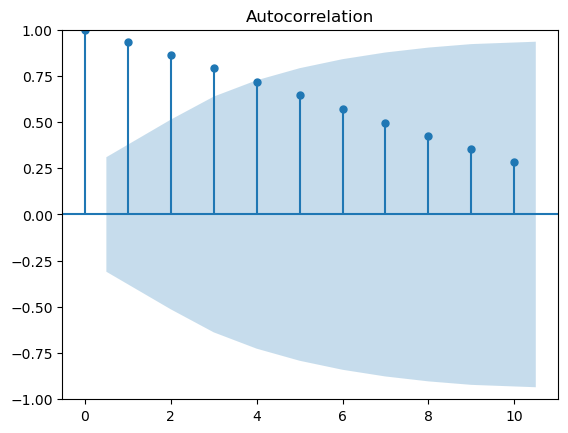

In [13]:
pacf=plot_pacf(df['Neonatal_Som'], lags=10)
acf=plot_acf(df['Neonatal_Som'], lags=10)

In [14]:
xtrain=x[:len(x)-3]
xtest=x[len(x)-3:]

In [16]:
model=AutoReg(xtrain,lags=3).fit()

In [17]:
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                   37
Model:                     AutoReg(3)   Log Likelihood                  42.741
Method:               Conditional MLE   S.D. of innovations              0.069
Date:                Sat, 23 Sep 2023   AIC                            -75.481
Time:                        21:57:50   BIC                            -67.849
Sample:                             3   HQIC                           -72.879
                                   37                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3281      0.125     -2.631      0.009      -0.572      -0.084
y.L1           2.3842      0.117     20.300      0.000       2.154       2.614
y.L2          -1.9201      0.224     -8.581      0.0

In [18]:
pred=model.predict(start=len(xtrain),end=len(x)-1,dynamic=False)

[46.52085182 44.90933739 43.29580777]


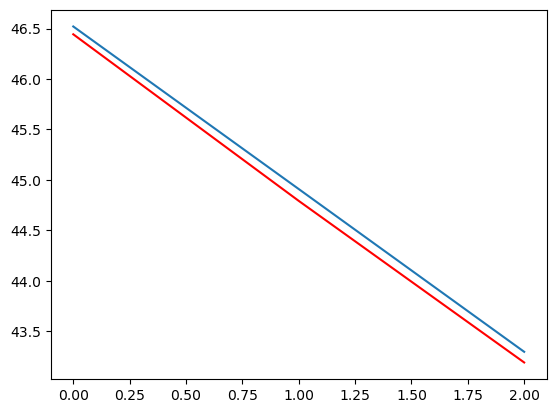

In [19]:
from matplotlib import pyplot
pyplot.plot(pred)
pyplot.plot(xtest, color='red')
print(pred)

In [20]:
#error calculation
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse=sqrt(mean_squared_error(xtest,pred))
print(rmse)

0.10155913378253932


In [21]:
#making future predictions
pred_future=model.predict(start=len(x)+1, end=len(x)+9, dynamic=False)

In [22]:
print("Predict the next Nine year(up to 2025)  Neonatal mortality  trend for Somali Region")
print(pred_future)
print("Number of predictions made :\t:", len(pred_future))

Predict the next Nine year(up to 2025)  Neonatal mortality  trend for Somali Region
[40.0130228  38.33351266 36.62777259 34.89741968 33.14459345 31.37135031
 29.57935391 27.76977204 25.94329956]
Number of predictions made :	: 9
